In [2]:
!pip install rasterio

    100% |████████████████████████████████| 26.6MB 677kB/s 
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import rasterio
import numpy as np
import glob

In [2]:
root = '/Users/andrespatrignani/Dropbox/Teaching/Scientific programming/introcoding-spring-2019/'
glob.os.chdir(root + 'Datasets/')


In [3]:
dataset = rasterio.open('storage_20180701_1km_v1.tif')

In [5]:
print(dataset.width)
print(dataset.height)

897
362


In [6]:
dataset.bounds

BoundingBox(left=-102.05833329251, bottom=36.99166665187, right=-94.5833332955, top=40.00833331733)

In [7]:
dataset_masked = np.ma.masked_equal(dataset,255)

TypeError: Image data cannot be converted to float

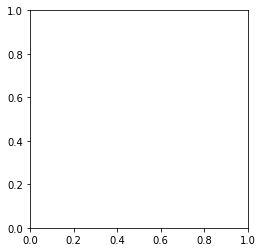

In [9]:
import matplotlib.pyplot as plt
plt.imshow(dataset, cmap='pink')
plt.show()

TypeError: Image data cannot be converted to float

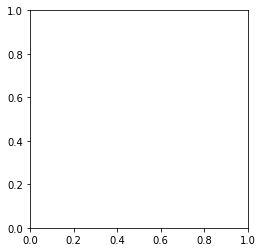

In [55]:
from rasterio.plot import show
show(dataset_masked)

AttributeError: 'MaskedArray' object has no attribute 'read'

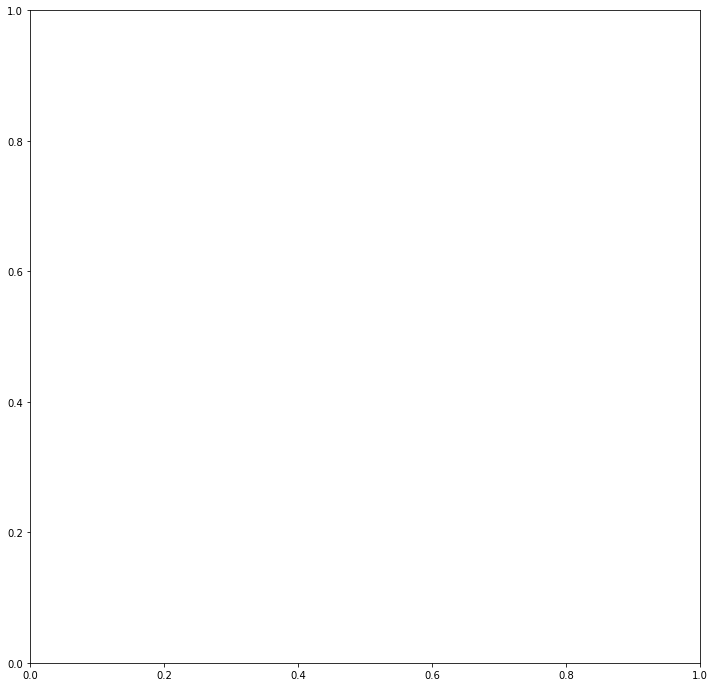

In [43]:
fig, ax = plt.subplots(1, figsize=(12, 12))
show((dataset_masked, 1), cmap='Greys_r', interpolation='none', ax=ax)

show((dataset, 1), contour=True, ax=ax)
plt.show()